In [1]:
# Step 1: Create Database and Insert Data
import sqlite3

# Create / connect to SQLite database
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

# Create table
cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    sale_date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample records
sample_data = [
    ("2025-10-01", "Notebook", 10, 2.5),
    ("2025-10-02", "Notebook", 5, 2.5),
    ("2025-10-01", "Pen", 50, 0.5),
    ("2025-10-03", "Pen", 30, 0.5),
    ("2025-10-02", "Stapler", 3, 5.0),
    ("2025-10-03", "Stapler", 2, 5.0)
]

cur.executemany("INSERT INTO sales (sale_date, product, quantity, price) VALUES (?, ?, ?, ?)", sample_data)
conn.commit()
conn.close()

print("✅ Database 'sales_data.db' created and data inserted successfully!")


✅ Database 'sales_data.db' created and data inserted successfully!


In [2]:
import numpy as np
import pandas as pd

print("✅ NumPy version:", np.__version__)
print("✅ Pandas version:", pd.__version__)


✅ NumPy version: 1.26.4
✅ Pandas version: 2.3.3


In [3]:
# ✅ Step 2 — Query Database and Analyze Data
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect("sales_data.db")

# Write SQL query
query = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
ORDER BY total_revenue DESC;
"""

# Execute SQL query and store results in pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Display the result
print("🧾 Sales Summary (Per Product):")
display(df)  # Jupyter pretty table


🧾 Sales Summary (Per Product):


,product,total_quantity,total_revenue
0,Pen,160,80.0
1,Notebook,30,75.0
2,Stapler,10,50.0


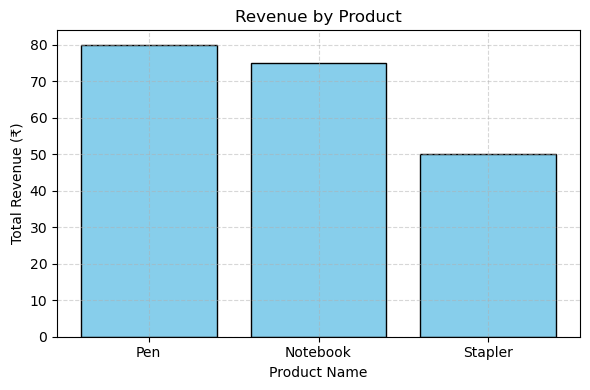

In [4]:
# Step 3: Visualize the Results using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(df["product"], df["total_revenue"], color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Product Name")
plt.ylabel("Total Revenue (₹)")
plt.title("Revenue by Product")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# Show chart
plt.show()


In [5]:
# Step 4: Save files for submission

# Save DataFrame to CSV
df.to_csv("sales_summary.csv", index=False)

# Save chart image
plt.figure(figsize=(6, 4))
plt.bar(df["product"], df["total_revenue"], color="orange", edgecolor="black")
plt.xlabel("Product")
plt.ylabel("Total Revenue (₹)")
plt.title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.png", dpi=150)
plt.close()

print("✅ Files saved successfully:")
print(" - sales_data.db (Database)")
print(" - sales_summary.csv (Table Output)")
print(" - sales_chart.png (Graph Image)")


✅ Files saved successfully:
 - sales_data.db (Database)
 - sales_summary.csv (Table Output)
 - sales_chart.png (Graph Image)
